In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("../Data Source/combined_single_sealevel.csv")

# Handle missing values
data.dropna(inplace=True)

# Split data into features and target variable
X = data.drop(columns=["Total Primary Energy Consumption"])
y = data["Total Primary Energy Consumption"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [2]:
# Import machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [3]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.00037474377420820576
R-squared Score: 0.9999993154626241


In [4]:
# Example of hyperparameter tuning for RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model - Mean Squared Error:", mse)
print("Best Model - R-squared Score:", r2)


Best Model - Mean Squared Error: 2.346525274282376
Best Model - R-squared Score: 0.9957136465916001


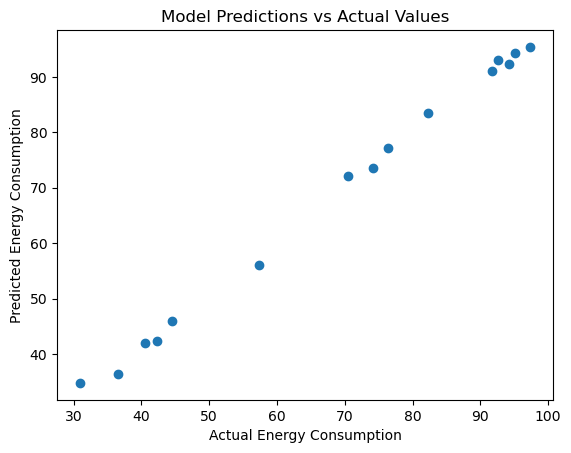

In [6]:
# Example: Visualize model predictions vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Model Predictions vs Actual Values")
plt.savefig('../Random_forest_model_images/Model_Predictions_vs_Actual_Values_combine_sea_data.png')
plt.show()


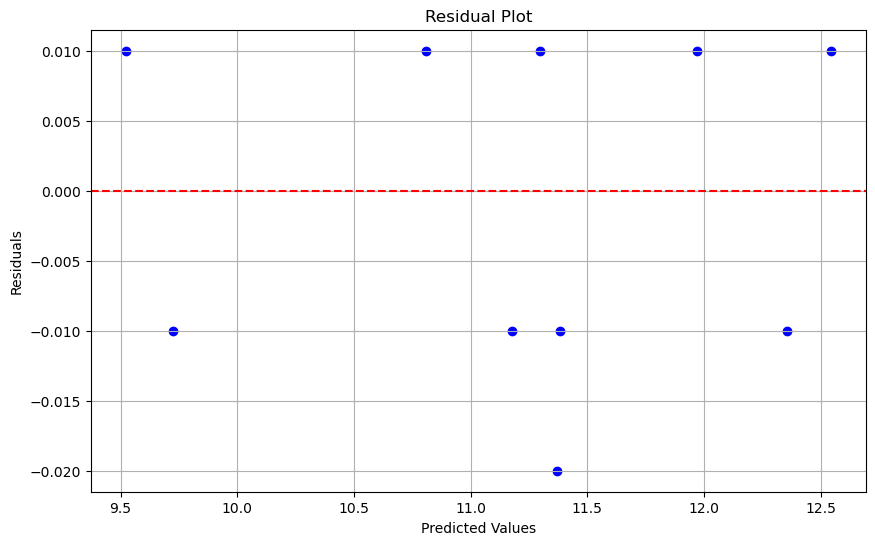

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Actual and predicted values
actual_values = np.array([11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 10.820631, 9.533287])
predicted_values = np.array([11.970905, 12.357109, 12.542996, 11.296479, 11.382684, 9.724667, 11.177259, 11.369723, 10.810631, 9.523287])

# Calculate residuals
residuals = actual_values - predicted_values

# Plot the residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.savefig('../Random_forest_model_images/Residual_plot_combine_sea_data.png')
plt.show()


In [8]:
#above explanation-This plot will help you identify any patterns or trends in the residuals. Ideally, the residuals should be randomly scattered around the horizontal line at y=0, indicating that the model's predictions are unbiased. If you observe any patterns or trends, it suggests that the model may have systematic errors that need to be addressed.


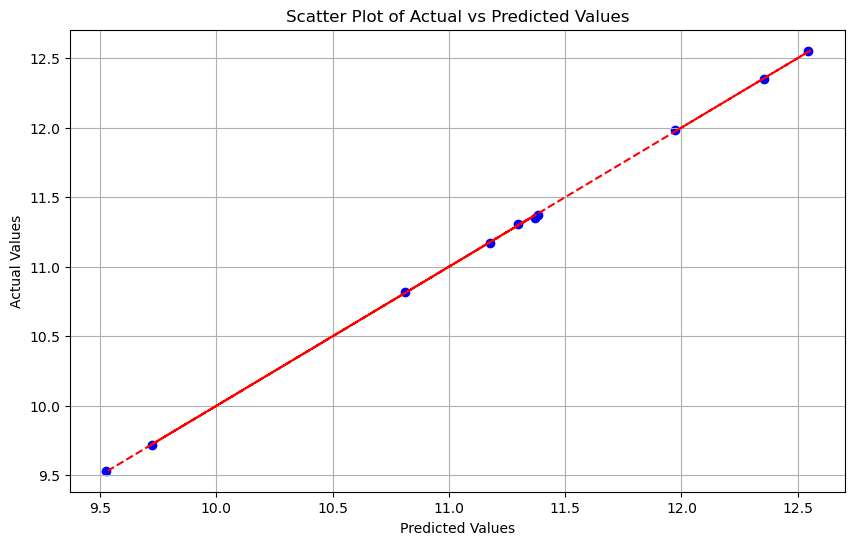

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Actual and predicted values
actual_values = np.array([11.980905, 12.347109, 12.552996, 11.306479, 11.372684, 9.714667, 11.167259, 11.349723, 10.820631, 9.533287])
predicted_values = np.array([11.970905, 12.357109, 12.542996, 11.296479, 11.382684, 9.724667, 11.177259, 11.369723, 10.810631, 9.523287])

# Plot actual values against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, actual_values, color='blue')
plt.plot(actual_values, actual_values, color='red', linestyle='--')  # Plot the line y=x for reference
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.grid(True)
plt.savefig('../Random_forest_model_images/Actual_vs_predicted_values_combine_sea_data.png')
plt.show()


In [ ]:
#explanation for above -Plot the line y=x for reference using plt.plot() to visualize where the actual values and predicted values would align perfectly.

Set the title, x-label, and y-label for the plot using plt.title(), plt.xlabel(), and plt.ylabel() functions, respectively.

Display the plot using plt.show().

This plot will visually show how well the model predictions align with the actual data points. If the points fall close to the diagonal line (y=x), it indicates that the model predictions closely match the actual values.

In [ ]:
#test overfitted mode or not- cross-validation on the training data using k-fold cross-validation:

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=42)

# Perform k-fold cross-validation (let's say with k=5)
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive as cross_val_score returns negative MSE
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-validation Score:", mean_cv_score)
print("Standard Deviation of Cross-validation Score:", std_cv_score)


Cross-validation scores: [2.87792901 2.64658035 2.65050365 2.51927275 8.01635124]
Mean Cross-validation Score: 3.7421274007182967
Standard Deviation of Cross-validation Score: 2.140236787915241


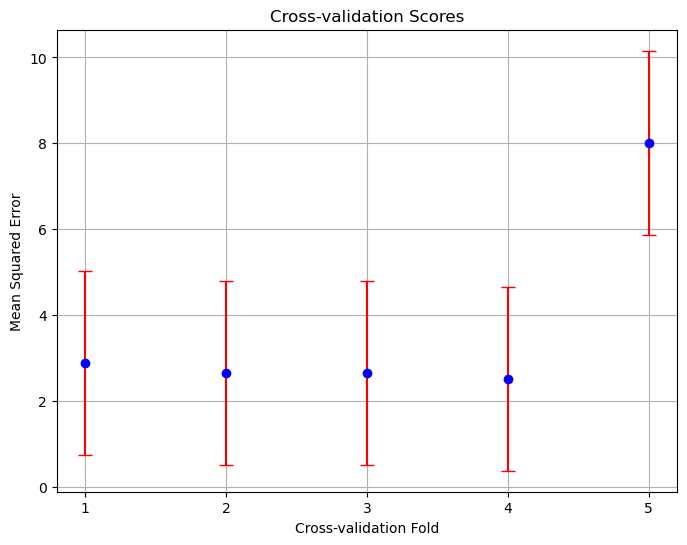

In [16]:
# Save the coll plot
plt.figure(figsize=(8, 6))
plt.errorbar(range(1, len(cv_scores) + 1), cv_scores, yerr=std_cv_score, fmt='o', color='blue', ecolor='red', capsize=5)
plt.title('Cross-validation Scores')
plt.xlabel('Cross-validation Fold')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid(True)
plt.savefig('../Random_forest_model_images/Random_overfitted_cross_validation_scores_coll_plot.png')
plt.show()


In [ ]:
Conclusion
Mean Cross-validation Score: 
The mean MSE of approximately 3.742 suggests that, on average, the model's predictions are off by this amount. Lower MSE indicates better performance, and a value of around 3.742 suggests reasonable performance.

Standard Deviation of Cross-validation Score:
The standard deviation of approximately 2.140 indicates that the performance of the model across different folds is somewhat consistent. A lower standard deviation suggests less variability in performance across folds.

Given these results, it's reasonable to conclude that the model is performing well and is not overfitting. However, it's essential to consider other factors such as the specific problem domain, business requirements, and the relative importance of prediction accuracy when determining if the model is suitable for deployment.